In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE


import tensorflow as tf
from tensorflow import keras

2023-04-27 16:57:36.565678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
df.shape

(1197, 15)

In [4]:
df.isnull().sum()/df.shape[0] * 100

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [7]:
df.loc[df['department'] == 'sweing']['wip'].sum()

822612.0

In [8]:
df.loc[df['department'] == 'finishing']['wip'].sum()

0.0

In [9]:
df.fillna(0, inplace = True)

In [10]:
idle_time = df.loc[(df['idle_time'] > 0)]

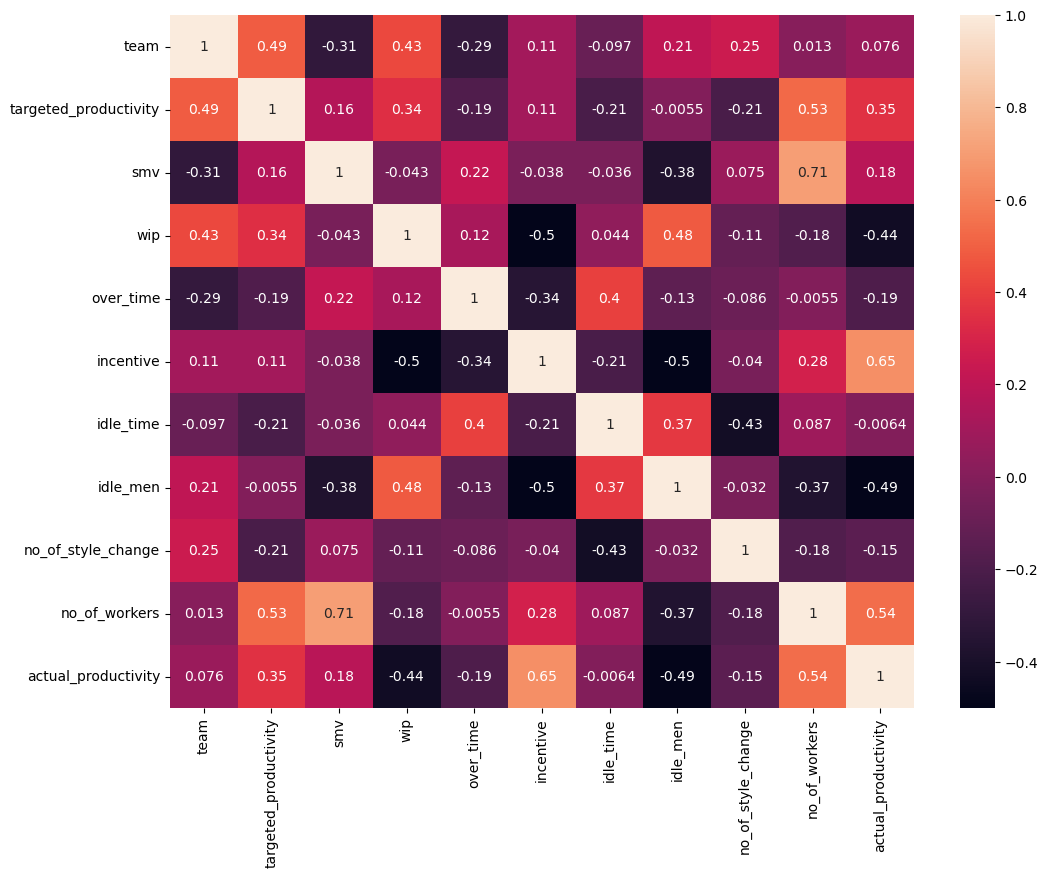

In [11]:
plt.figure(figsize=(12, 9))
sb.heatmap(idle_time.corr(), annot=True)
plt.show()

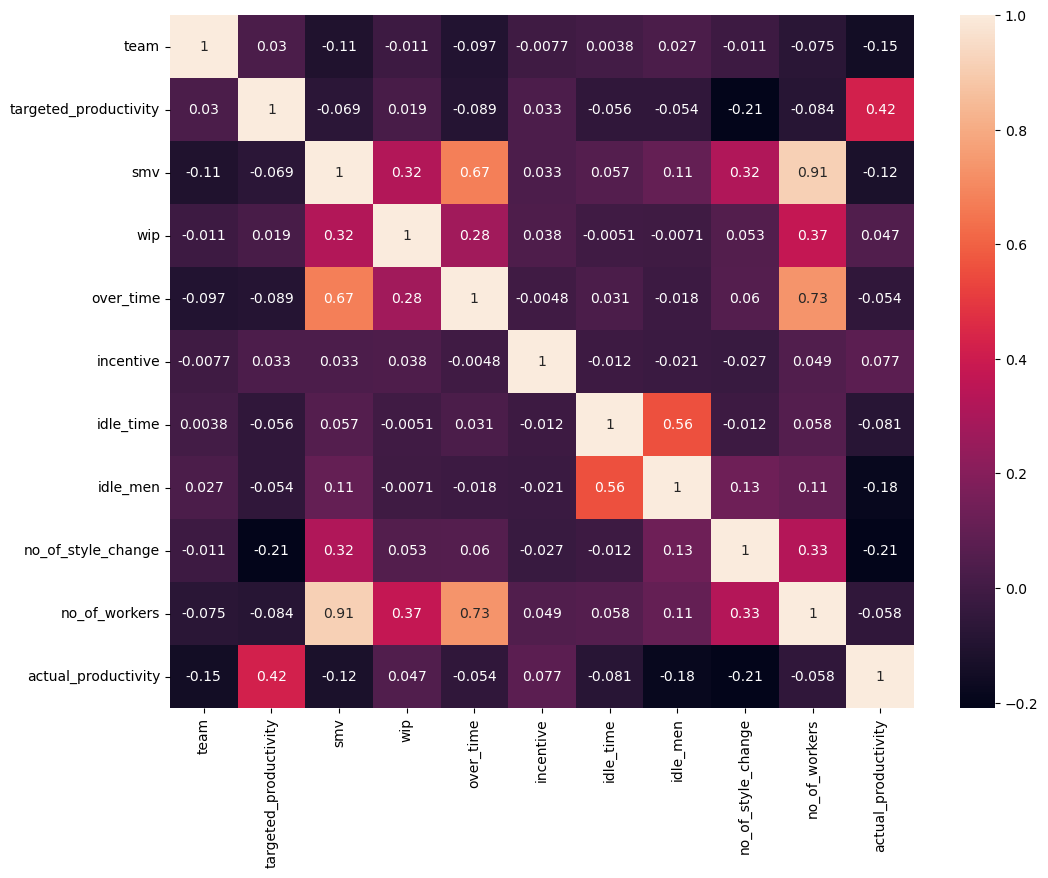

In [12]:
plt.figure(figsize=(12, 9))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.drop('targeted_productivity', axis = 1, inplace = True)

In [14]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [15]:
df.drop(['date'], axis=1, inplace=True)

In [16]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [17]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"

In [18]:
df['department']=df['department'].replace(['sweing'],['sewing'])

# Graphs

<Axes: ylabel='department'>

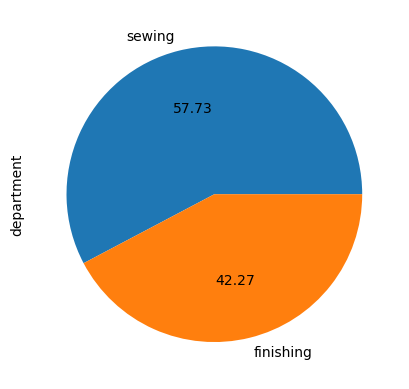

In [19]:
df['department'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='team'>

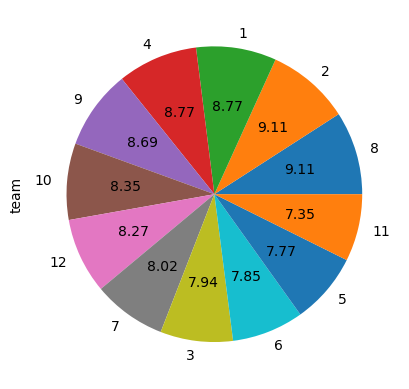

In [20]:
df['team'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='quarter'>

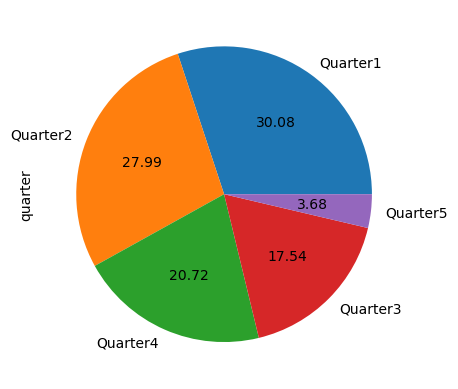

In [21]:
df['quarter'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='month'>

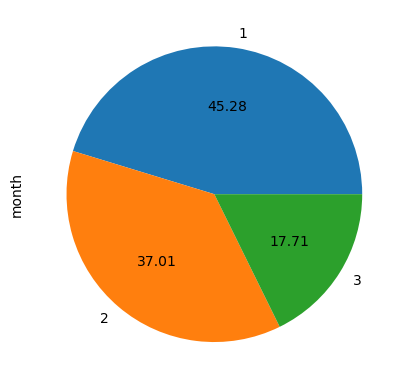

In [22]:
df['month'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='day'>

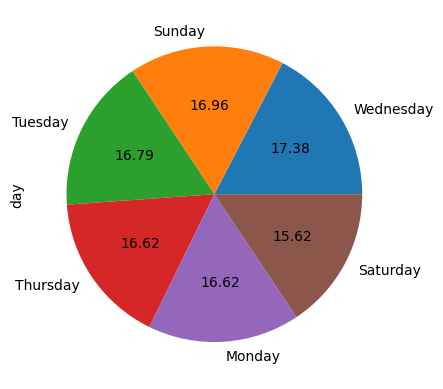

In [23]:
df['day'].value_counts().plot(kind = 'pie', autopct = '%.2f')

Text(0.5, 1.0, 'Average productivity by department')

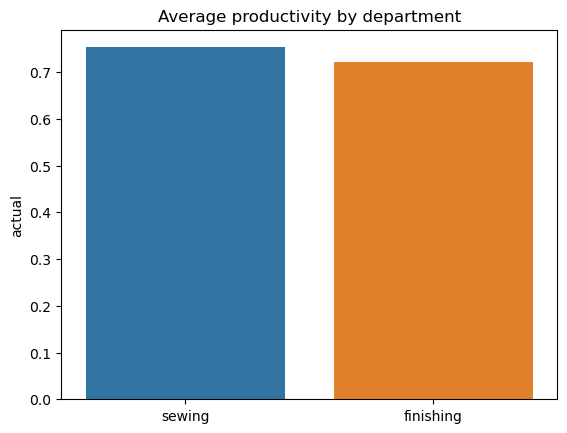

In [24]:
teams_agg = df.groupby('department').agg(actual = ('actual_productivity','mean'))
sb.barplot(data = teams_agg, x=df['department'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average productivity by department')

Text(0.5, 1.0, 'Average productivity by team')

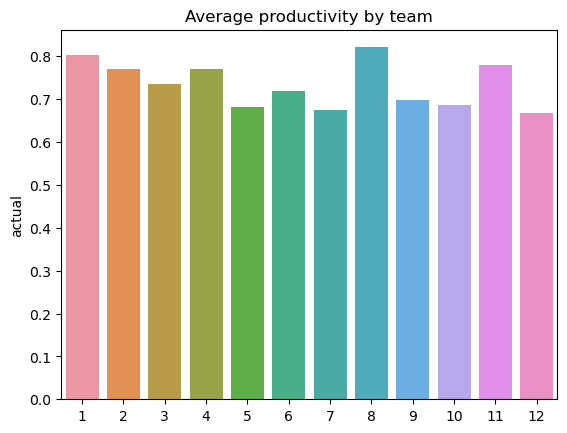

In [25]:
teams_agg = df.groupby('team').agg(actual = ('actual_productivity','mean'))
sb.barplot(data = teams_agg, x=df['team'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average productivity by team')

Text(0.5, 1.0, 'Average productivity by quarter')

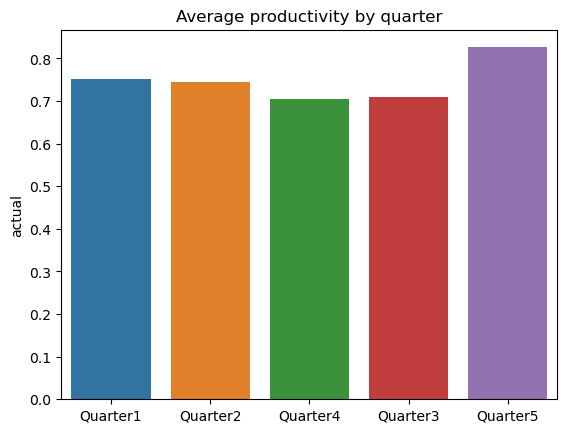

In [26]:
teams_agg = df.groupby('quarter').agg(actual = ('actual_productivity','mean'))
sb.barplot(data = teams_agg, x=df['quarter'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average productivity by quarter')

Text(0.5, 1.0, 'Average incentive by quarter')

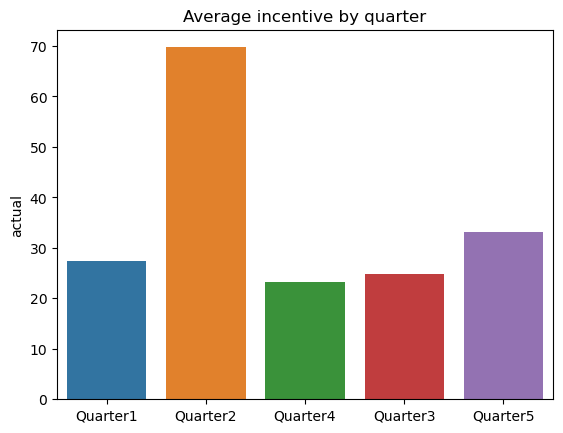

In [27]:
teams_agg = df.groupby('quarter').agg(actual = ('incentive','mean'))
sb.barplot(data = teams_agg, x=df['quarter'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average incentive by quarter')

Text(0.5, 1.0, 'Average productivity by day')

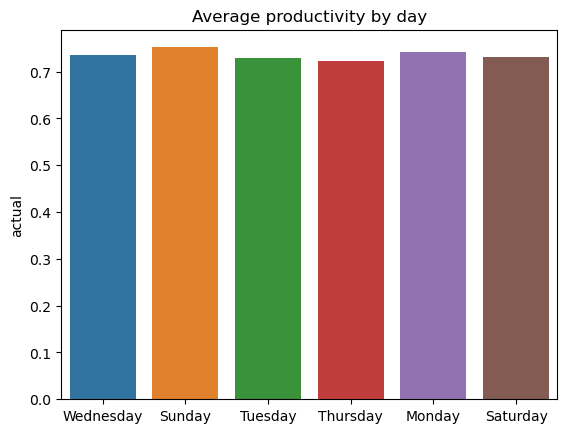

In [28]:
teams_agg = df.groupby('day').agg(actual = ('actual_productivity','mean'))
sb.barplot(data = teams_agg, x=df['day'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average productivity by day')

Text(0.5, 1.0, 'Average productivity by month')

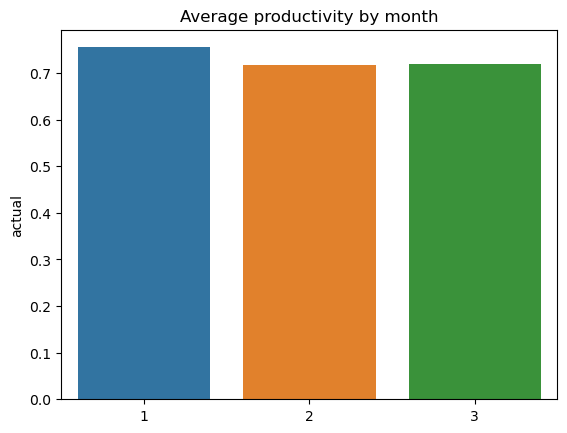

In [29]:
teams_agg = df.groupby('month').agg(actual = ('actual_productivity','mean'))
sb.barplot(data = teams_agg, x=df['month'].value_counts().index.values, y = teams_agg['actual'])
plt.title('Average productivity by month')

<Axes: >

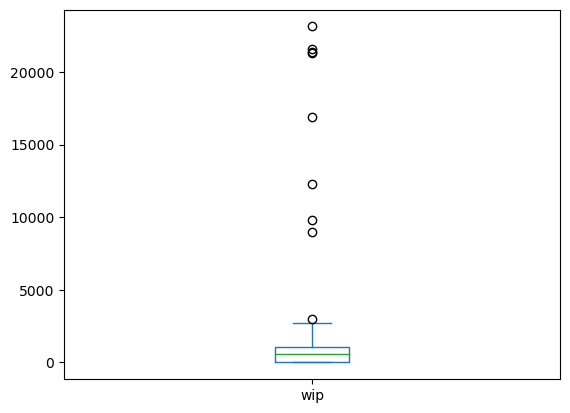

In [30]:
df['wip'].plot(kind = 'box')

<Axes: >

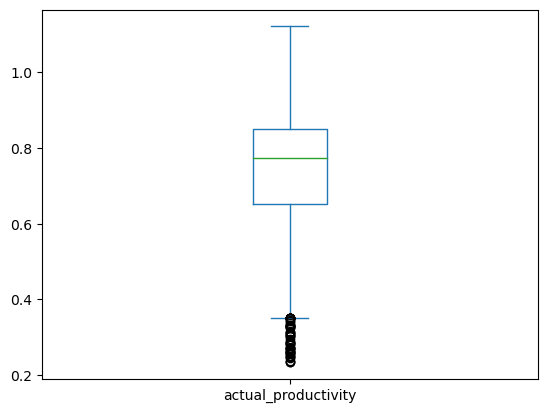

In [31]:
df['actual_productivity'].plot(kind = 'box')

<Axes: >

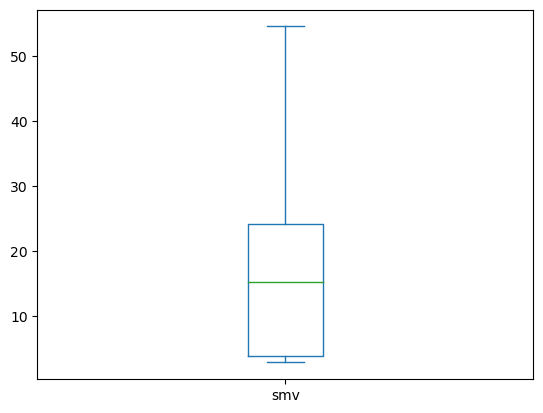

In [32]:
df['smv'].plot(kind = 'box')

<Axes: >

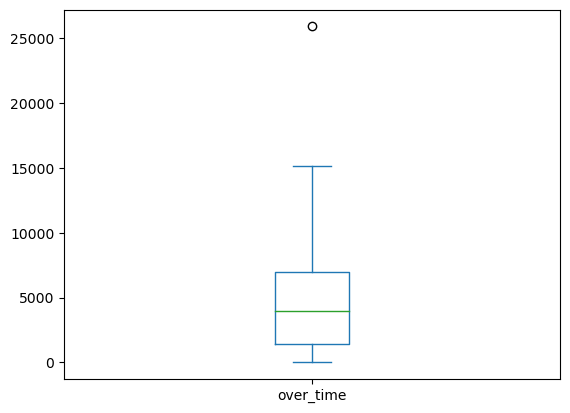

In [33]:
df['over_time'].plot(kind = 'box')

<Axes: >

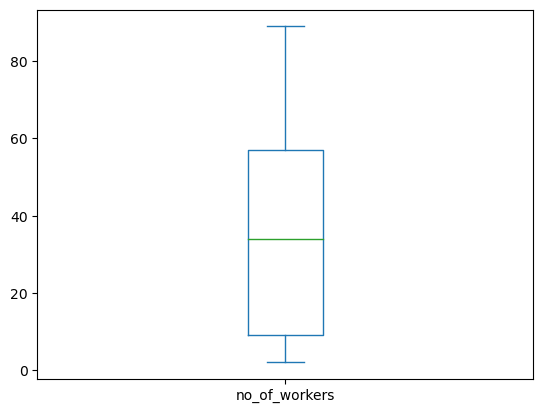

In [34]:
df['no_of_workers'].plot(kind = 'box')

<Axes: >

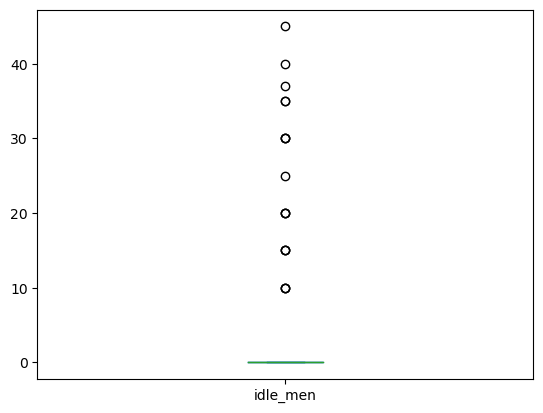

In [35]:
df['idle_men'].plot(kind = 'box')

<Axes: >

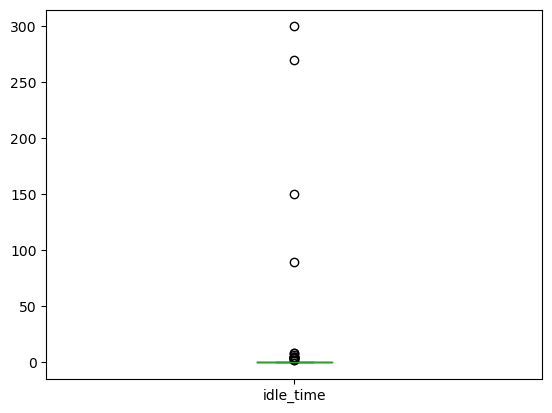

In [36]:
df['idle_time'].plot(kind = 'box')

# Dealing with categorical variables

In [37]:
dd = pd.get_dummies(df['department'], prefix = "department")

In [38]:
df = pd.concat([df, dd], axis=1)

In [39]:
df.drop(['department'], axis=1, inplace=True)

In [40]:
td = pd.get_dummies(df['team'], prefix = "team_no")

In [41]:
df = pd.concat([df, td], axis=1)

In [42]:
df.drop(['team'], axis=1, inplace=True)

In [43]:
dayd = pd.get_dummies(df['day'], prefix = "day")

In [44]:
df = pd.concat([df, dayd], axis=1)

In [45]:
df.drop(['day'], axis=1, inplace=True)

In [46]:
qd = pd.get_dummies(df['quarter'], prefix = "quarter")

In [47]:
df = pd.concat([df, qd], axis=1)

In [48]:
df.drop(['quarter'], axis=1, inplace=True)

In [49]:
df.head()

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,...,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5
0,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,...,0,0,1,0,0,1,0,0,0,0
1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,...,0,0,1,0,0,1,0,0,0,0
2,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,...,0,0,1,0,0,1,0,0,0,0
3,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,...,0,0,1,0,0,1,0,0,0,0
4,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,...,0,0,1,0,0,1,0,0,0,0


# Splitting data

In [50]:
def model_evaluation(y_val, y_predicted, N, d):
    mse = mean_squared_error(y_val, y_predicted) 
    mae = mean_absolute_error(y_val, y_predicted) 
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    res=pd.concat([pd.DataFrame(y_val.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y_val', 'y_pred']
    print(res.head(20))

In [51]:
x = df.drop(['actual_productivity'], axis=1).copy()
y = df['actual_productivity'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Linear regression

In [52]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100) 

hyper_params = [{'n_features_to_select' : list(range(1, 35))}] 

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(x_train, y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
0.17661703797067602
{'n_features_to_select': 33}


In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034578,0.003294,0.001320,0.000075,1,{'n_features_to_select': 1},-0.021111,-0.029349,0.027216,0.017403,...,0.001359,0.022365,33,0.006495,0.020890,0.008624,0.011208,0.013187,0.012081,0.004954
1,0.034370,0.001593,0.001337,0.000049,2,{'n_features_to_select': 2},-0.020202,0.001687,0.026769,0.010461,...,0.004768,0.015163,32,0.014785,0.049203,0.015474,0.018376,0.021349,0.023838,0.012895
2,0.034132,0.000742,0.001327,0.000044,3,{'n_features_to_select': 3},-0.006372,0.046066,0.024127,0.012473,...,0.015803,0.018216,30,0.018420,0.061658,0.021859,0.024649,0.027676,0.030852,0.015703
3,0.033840,0.001412,0.001341,0.000014,4,{'n_features_to_select': 4},-0.018364,0.069187,0.041975,0.020240,...,0.026843,0.028780,25,0.020171,0.106165,0.025800,0.031776,0.032019,0.043186,0.031791
4,0.033314,0.000990,0.001427,0.000134,5,{'n_features_to_select': 5},-0.018364,0.078463,0.044213,0.016741,...,0.029314,0.031885,23,0.020171,0.116808,0.028526,0.034648,0.038664,0.047763,0.035081
5,0.031940,0.000468,0.001361,0.000105,6,{'n_features_to_select': 6},-0.013535,0.079398,0.048088,0.013118,...,0.030175,0.031578,22,0.020759,0.129684,0.028879,0.036428,0.041032,0.051356,0.039765
6,0.032138,0.001094,0.001339,0.000014,7,{'n_features_to_select': 7},-0.012737,0.110266,0.049271,0.013118,...,0.036744,0.041800,20,0.020965,0.141896,0.029007,0.036428,0.041032,0.053865,0.044539
7,0.030335,0.000891,0.001380,0.000119,8,{'n_features_to_select': 8},-0.012737,0.083823,0.049271,-1.458889,...,-0.262946,0.598805,34,0.020965,0.145616,0.029007,-1.129406,0.041032,-0.178557,0.477559
8,0.029096,0.000371,0.001322,0.000031,9,{'n_features_to_select': 9},-0.033512,0.078027,0.049417,0.018881,...,0.024544,0.037672,26,0.071112,0.152109,0.029225,0.038120,0.039308,0.065975,0.045350
9,0.028909,0.000749,0.001352,0.000030,10,{'n_features_to_select': 10},-0.070320,0.061167,0.043156,0.015558,...,0.010778,0.045230,31,0.084214,0.153453,0.029498,0.037353,0.039596,0.068823,0.046455


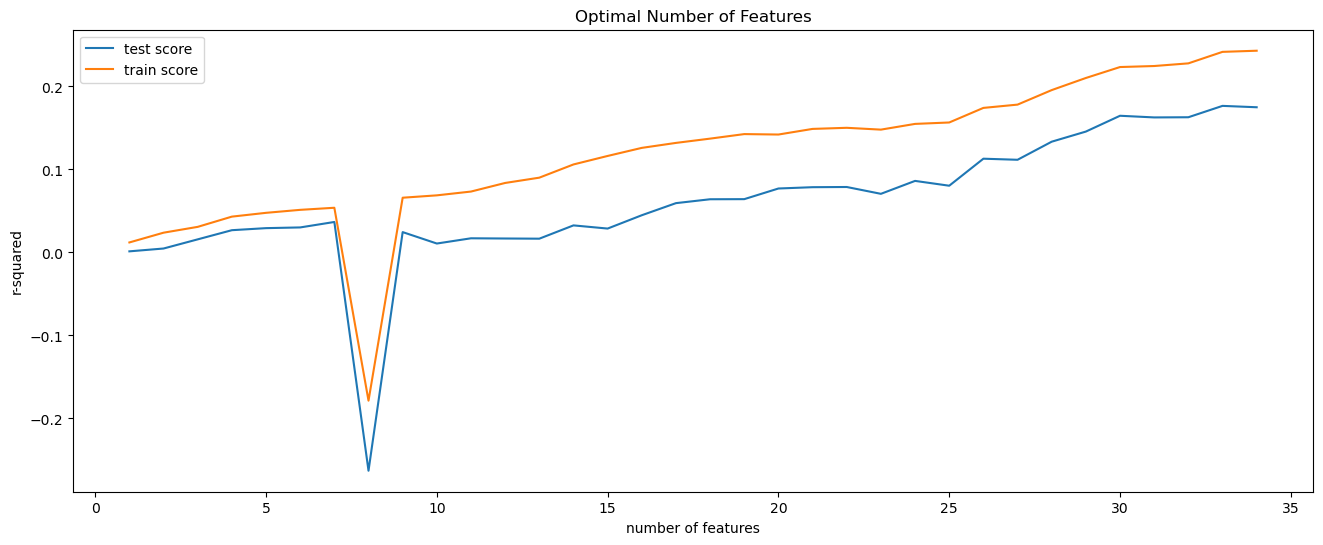

In [54]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [55]:
n_features_optimal = 33

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)
rfe = rfe.fit(x_train, y_train)

y_lm_pred = lm.predict(x_test)

In [56]:
model_evaluation(y_test, y_lm_pred, x_train.shape[0], x_train.shape[1])

Mean squared error:  0.026816747289637795
Mean absolute error:  0.1235861825862796
Root mean squared error:  0.163758197625761
R2 score:  -0.009953153157440608
R2 adjusted score:  -0.04719654492246561
       y_val    y_pred
0   0.268214  0.696856
1   0.800359  0.684145
2   0.681061  0.767118
3   0.325000  0.747930
4   0.667604  0.732348
5   0.800980  0.732543
6   0.768847  0.742601
7   0.768847  0.788502
8   0.650417  0.699725
9   0.750396  0.712418
10  0.700398  0.714143
11  0.861679  0.846861
12  0.800319  0.891519
13  0.816406  0.757696
14  0.900145  0.669531
15  0.935322  0.833175
16  1.000345  0.846393
17  0.600448  0.692421
18  0.714410  0.644994
19  0.900321  0.786374


# KNN

In [57]:
folds = KFold (n_splits = 5, shuffle = True, random_state = 100)

hyper_params = {'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'mahalanobis'], 'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

knn_model = KNeighborsRegressor()

model_cv = GridSearchCV(estimator = knn_model,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'mahalanobis'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002502,0.000424,0.010395,0.010230,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",-0.228153,-0.648975,0.024333,...,-0.383510,0.276781,42,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002242,0.000140,0.005213,0.000195,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.083936,-0.148555,0.193671,...,0.061203,0.128744,35,0.536237,0.558256,0.551915,0.544001,0.542393,0.546560,0.007693
2,0.002236,0.000100,0.007303,0.004015,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.105222,-0.059793,0.196979,...,0.101908,0.099855,18,0.417674,0.456612,0.403714,0.412054,0.418898,0.421791,0.018218
3,0.002255,0.000102,0.005105,0.000108,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.080808,-0.024977,0.221759,...,0.100204,0.089879,22,0.334656,0.364285,0.322481,0.327257,0.334227,0.336581,0.014578
4,0.002213,0.000129,0.005739,0.001258,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.092959,0.014520,0.216627,...,0.122089,0.072769,10,0.297055,0.313837,0.290636,0.281727,0.291478,0.294947,0.010646
5,0.002205,0.000113,0.005813,0.000884,euclidean,11,"{'metric': 'euclidean', 'n_neighbors': 11}",0.096642,0.020038,0.195445,...,0.109719,0.056150,12,0.261270,0.269979,0.246064,0.239947,0.254748,0.254402,0.010662
6,0.002212,0.000098,0.005274,0.000262,euclidean,13,"{'metric': 'euclidean', 'n_neighbors': 13}",0.095932,0.017343,0.191856,...,0.103494,0.055385,16,0.231322,0.250639,0.216372,0.209374,0.231523,0.227846,0.014269
7,0.002218,0.000142,0.005280,0.000177,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.101895,0.020007,0.152269,...,0.096615,0.042771,24,0.221620,0.228147,0.187265,0.198047,0.218977,0.210811,0.015501
8,0.002105,0.000074,0.007294,0.003671,euclidean,17,"{'metric': 'euclidean', 'n_neighbors': 17}",0.094692,0.023813,0.164518,...,0.103530,0.047557,14,0.206445,0.215167,0.175348,0.190790,0.199471,0.197444,0.013651
9,0.002188,0.000095,0.005452,0.000181,euclidean,19,"{'metric': 'euclidean', 'n_neighbors': 19}",0.096401,0.018378,0.167421,...,0.100393,0.053115,20,0.192290,0.200654,0.165457,0.180891,0.188171,0.185493,0.011882


In [59]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.16231139529438238
{'metric': 'manhattan', 'n_neighbors': 11}


In [60]:
model_kn = KNeighborsRegressor(n_neighbors=11, metric = 'manhattan')
model_kn.fit(x_train, y_train)
y_kn9_pred = model_kn.predict(x_test)

In [61]:
model_evaluation(y_test, y_kn9_pred, x_train.shape[0], x_train.shape[1])

Mean squared error:  0.023471837164845268
Mean absolute error:  0.11190067326212122
Root mean squared error:  0.1532052125903204
R2 score:  0.11602045919292159
R2 adjusted score:  0.0834225151718363
       y_val    y_pred
0   0.268214  0.736675
1   0.800359  0.746808
2   0.681061  0.732534
3   0.325000  0.630302
4   0.667604  0.696473
5   0.800980  0.701063
6   0.768847  0.457614
7   0.768847  0.461276
8   0.650417  0.800186
9   0.750396  0.682154
10  0.700398  0.612814
11  0.861679  0.720802
12  0.800319  0.772062
13  0.816406  0.848245
14  0.900145  0.805665
15  0.935322  0.674725
16  1.000345  0.850442
17  0.600448  0.683769
18  0.714410  0.674053
19  0.900321  0.671515


# Decision tree regressor

In [62]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'min_samples_split' : range(2, 25), 'min_samples_leaf' : range(1, 20)}]

dtr = DecisionTreeRegressor()

model_cv = GridSearchCV(estimator = dtr,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 437 candidates, totalling 2185 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid=[{'min_samples_leaf': range(1, 20),
                          'min_samples_split': range(2, 25)}],
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.3794844775832635
{'min_samples_leaf': 11, 'min_samples_split': 23}


In [64]:
y_dtr_pred = model_cv.predict(x_test)

In [65]:
model_evaluation(y_test, y_dtr_pred, x_train.shape[0], x_train.shape[1])

Mean squared error:  0.0162050493842366
Mean absolute error:  0.08641239668648197
Root mean squared error:  0.1272990549227943
R2 score:  0.38969702231538417
R2 adjusted score:  0.3671912725959948
       y_val    y_pred
0   0.268214  0.376863
1   0.800359  0.800463
2   0.681061  0.660657
3   0.325000  0.592405
4   0.667604  0.714909
5   0.800980  0.570897
6   0.768847  0.592405
7   0.768847  0.592405
8   0.650417  0.564490
9   0.750396  0.769322
10  0.700398  0.833664
11  0.861679  0.912664
12  0.800319  0.787692
13  0.816406  0.783286
14  0.900145  0.861931
15  0.935322  0.767402
16  1.000345  1.006100
17  0.600448  0.540511
18  0.714410  0.642685
19  0.900321  0.747120


# PCA

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std=scaler.fit_transform(x)
x_std

array([[ 1.01455214,  0.27792995,  0.75058892, ..., -0.4612656 ,
        -0.51120222, -0.19534922],
       [-1.01677766, -0.45393063, -1.07768238, ..., -0.4612656 ,
        -0.51120222, -0.19534922],
       [-0.33387786,  0.1854566 , -0.2710921 , ..., -0.4612656 ,
        -0.51120222, -0.19534922],
       ...,
       [-1.02043442, -0.45393063, -1.07768238, ..., -0.4612656 ,
        -0.51120222, -0.19534922],
       [-1.11185341, -0.45393063, -0.82674318, ..., -0.4612656 ,
        -0.51120222, -0.19534922],
       [-1.11185341, -0.45393063, -1.14937929, ..., -0.4612656 ,
        -0.51120222, -0.19534922]])

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_std)

array([[ 1.98586948e+00, -4.74805002e-01,  8.41512435e-01, ...,
        -4.73116515e-15, -1.47061769e-15,  4.08359624e-15],
       [-2.54028198e+00, -6.19395239e-01,  6.13889910e-01, ...,
         1.80146904e-15, -3.17700115e-16, -9.66335731e-16],
       [ 5.05605419e-01, -6.45338283e-01,  4.43491428e-01, ...,
         8.68965866e-16, -3.15845214e-15, -4.45460368e-17],
       ...,
       [-2.60996322e+00,  1.75524002e+00,  3.04080303e-02, ...,
         1.16924205e-16,  2.27067793e-16,  4.01861210e-17],
       [-2.48900760e+00,  1.73419718e+00, -9.10054734e-01, ...,
         1.17582738e-17,  2.66389300e-17, -2.65054616e-18],
       [-2.90221969e+00,  1.63115432e+00, -6.79185221e-01, ...,
         2.87279171e-16, -1.81559689e-16,  4.92024712e-17]])

In [68]:
pca.get_covariance()

array([[ 1.00083612,  0.32297368,  0.67545173, ...,  0.03666975,
        -0.00651586, -0.01882637],
       [ 0.32297368,  1.00083612,  0.27675978, ..., -0.01667381,
        -0.02407516, -0.0088932 ],
       [ 0.67545173,  0.27675978,  1.00083612, ...,  0.04530969,
         0.0433752 , -0.04917891],
       ...,
       [ 0.03666975, -0.01667381,  0.04530969, ...,  1.00083612,
        -0.23599716, -0.09018322],
       [-0.00651586, -0.02407516,  0.0433752 , ..., -0.23599716,
         1.00083612, -0.09994645],
       [-0.01882637, -0.0088932 , -0.04917891, ..., -0.09018322,
        -0.09994645,  1.00083612]])

In [69]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.37179632e-01, 5.21412709e-02, 4.99676225e-02, 4.58647472e-02,
       4.01421582e-02, 3.88375145e-02, 3.86017767e-02, 3.59114607e-02,
       3.56575846e-02, 3.50017066e-02, 3.45041026e-02, 3.38017172e-02,
       3.23886203e-02, 3.22814863e-02, 3.21999058e-02, 3.19895080e-02,
       3.19190978e-02, 3.18677696e-02, 3.16405928e-02, 3.13330166e-02,
       3.09432453e-02, 2.88849824e-02, 2.51881799e-02, 2.37119230e-02,
       2.02356510e-02, 1.31798555e-02, 1.17806139e-02, 8.36633655e-03,
       3.42665251e-03, 1.05126946e-03, 2.70539121e-32, 8.84492542e-33,
       4.09468212e-33, 9.06176125e-34])

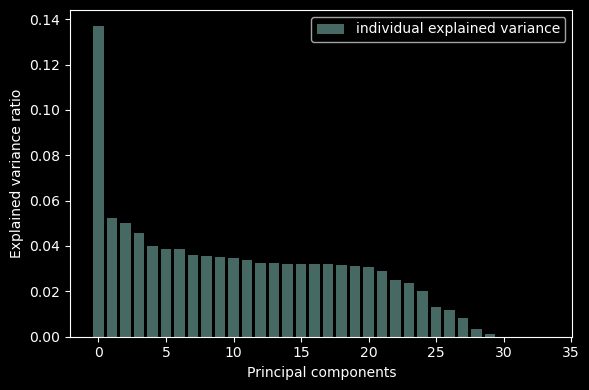

In [70]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(34), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [71]:
pca=PCA(n_components=25)
x_new=pca.fit_transform(x_std)
x_new

array([[ 1.98586948, -0.474805  ,  0.84151244, ...,  0.9281207 ,
        -0.91203375,  0.28528609],
       [-2.54028198, -0.61939524,  0.61388991, ..., -0.30152354,
        -0.59219125, -0.05606405],
       [ 0.50560542, -0.64533828,  0.44349143, ...,  0.31522689,
        -0.81213254,  0.32926962],
       ...,
       [-2.60996322,  1.75524002,  0.03040803, ...,  0.0303355 ,
         0.39378957,  0.62900483],
       [-2.4890076 ,  1.73419718, -0.91005473, ..., -0.92429734,
         0.38883532,  0.21413075],
       [-2.90221969,  1.63115432, -0.67918522, ..., -0.29146713,
         0.08508883,  0.34111401]])

In [72]:
pca.get_covariance()

array([[ 1.01416438,  0.32568129,  0.70293209, ...,  0.03438483,
        -0.01146503, -0.01557936],
       [ 0.32568129,  1.00041818,  0.27349138, ..., -0.01524287,
        -0.02169817, -0.00877742],
       [ 0.70293209,  0.27349138,  0.89920466, ...,  0.03982832,
         0.04270965, -0.06997272],
       ...,
       [ 0.03438483, -0.01524287,  0.03982832, ...,  1.01922943,
        -0.2170531 , -0.0823746 ],
       [-0.01146503, -0.02169817,  0.04270965, ..., -0.2170531 ,
         1.01611282, -0.09065606],
       [-0.01557936, -0.00877742, -0.06997272, ..., -0.0823746 ,
        -0.09065606,  1.00080219]])

In [73]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.13717963, 0.05214127, 0.04996762, 0.04586475, 0.04014216,
       0.03883751, 0.03860178, 0.03591146, 0.03565758, 0.03500171,
       0.0345041 , 0.03380172, 0.03238862, 0.03228149, 0.03219991,
       0.03198951, 0.0319191 , 0.03186777, 0.03164059, 0.03133302,
       0.03094325, 0.02888498, 0.02518818, 0.02371192, 0.02023565])

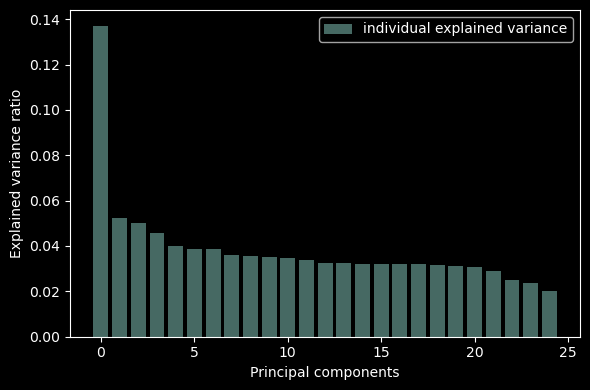

In [74]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(25), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y, test_size=0.2, random_state=1)
X_train.shape

(957, 25)

# PCA KNN Regressor

In [85]:
folds = KFold (n_splits = 5, shuffle = True, random_state = 100)

hyper_params = {'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'mahalanobis'], 'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

knn_model = KNeighborsRegressor()

model_cv = GridSearchCV(estimator = knn_model,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, Y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
0.13473350781458376
{'metric': 'manhattan', 'n_neighbors': 19}


In [86]:
y_kn11_pred = model_cv.predict(X_test)

In [87]:
model_evaluation(Y_test, y_kn11_pred, X_train.shape[0], X_train.shape[1])

Mean squared error:  0.02883103386093429
Mean absolute error:  0.12549458614978068
Root mean squared error:  0.16979703725605547
R2 score:  0.09986823981440895
R2 adjusted score:  0.07569713991683669
       y_val    y_pred
0   0.902500  0.718752
1   0.800579  0.803929
2   0.329965  0.760903
3   0.597348  0.675819
4   0.786600  0.784983
5   0.945600  0.810859
6   0.817424  0.677844
7   0.650300  0.671119
8   0.830063  0.767497
9   0.800889  0.808864
10  0.280333  0.674727
11  0.821354  0.718918
12  1.000230  0.830978
13  0.806879  0.787831
14  0.905455  0.851117
15  0.447917  0.758440
16  0.650417  0.781078
17  0.700135  0.733008
18  0.800402  0.722566
19  0.555431  0.841980


# PCA Linear Regression

In [88]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100) 

hyper_params = [{'n_features_to_select' : list(range(1, 26))}] 

lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, Y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.1306153668163523
{'n_features_to_select': 6}


In [89]:
y_lm_pca_pred = model_cv.predict(X_test)

In [90]:
model_evaluation(Y_test, y_lm_pca_pred, X_train.shape[0], X_train.shape[1])

Mean squared error:  0.030510576039062133
Mean absolute error:  0.13421979773066156
Root mean squared error:  0.17467276845307667
R2 score:  0.04743136695038597
R2 adjusted score:  0.021852187760009634
       y_val    y_pred
0   0.902500  0.763111
1   0.800579  0.800845
2   0.329965  0.698916
3   0.597348  0.697545
4   0.786600  0.801993
5   0.945600  0.764606
6   0.817424  0.695742
7   0.650300  0.762961
8   0.830063  0.734738
9   0.800889  0.778917
10  0.280333  0.718912
11  0.821354  0.672299
12  1.000230  0.829104
13  0.806879  0.757963
14  0.905455  0.798443
15  0.447917  0.760001
16  0.650417  0.834858
17  0.700135  0.708598
18  0.800402  0.787539
19  0.555431  0.811241


# PCA Decision Tree Regressor

In [91]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'min_samples_split' : range(2, 25), 'min_samples_leaf' : range(1, 20)}]

dtr = DecisionTreeRegressor()

model_cv = GridSearchCV(estimator = dtr,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 437 candidates, totalling 2185 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid=[{'min_samples_leaf': range(1, 20),
                          'min_samples_split': range(2, 25)}],
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
y_dtr_pca_pred = model_cv.predict(X_test)

In [93]:
model_evaluation(Y_test, y_dtr_pca_pred, X_train.shape[0], X_train.shape[1])

Mean squared error:  0.03414826383331171
Mean absolute error:  0.14483250405308087
Root mean squared error:  0.1847924885738371
R2 score:  -0.0661406378912539
R2 adjusted score:  -0.0947695486831781
       y_val    y_pred
0   0.902500  0.659064
1   0.800579  0.755352
2   0.329965  0.859395
3   0.597348  0.729273
4   0.786600  0.831689
5   0.945600  0.830403
6   0.817424  0.764606
7   0.650300  0.658919
8   0.830063  0.836679
9   0.800889  0.859395
10  0.280333  0.557668
11  0.821354  0.783958
12  1.000230  0.713805
13  0.806879  0.557668
14  0.905455  0.836679
15  0.447917  0.709966
16  0.650417  0.755352
17  0.700135  0.738546
18  0.800402  0.659064
19  0.555431  0.738617
